<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.

In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../")

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_ajuste_logistica as sc

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_pickle("../data/financial_data_clean.pkl")
df.head()

,is_fraudulent,card_type,location,transaction_description,customer_id,merchant_id,amount,customer_age,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0.0,0.521611,0.497382,0.517856,0.60,-0.450980,0.160961,-0.038462,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.507631,0.529126,0.536825,-0.74,0.058824,-0.601127,0.653846,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.521611,0.600000,0.506026,-0.96,-0.294118,-0.730090,0.500000,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.504747,0.600000,0.525765,0.86,-0.254902,0.528558,0.576923,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.521611,0.497382,0.523806,-0.32,0.647059,-0.603391,-0.307692,0.0,0.0,0.0,0.0,1.0,0.0


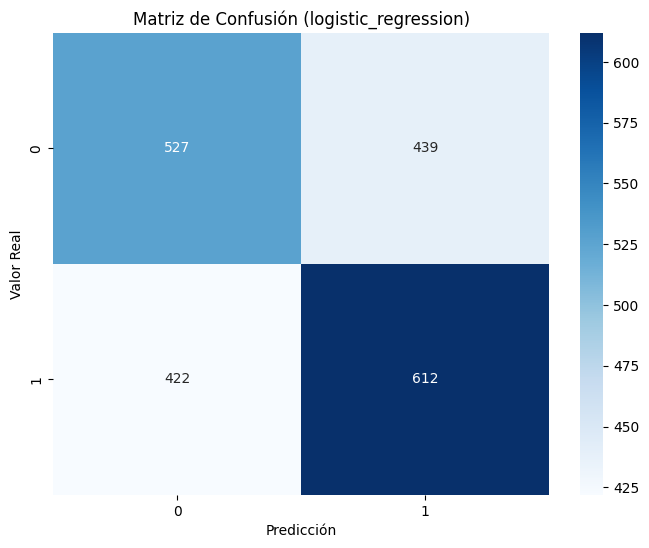

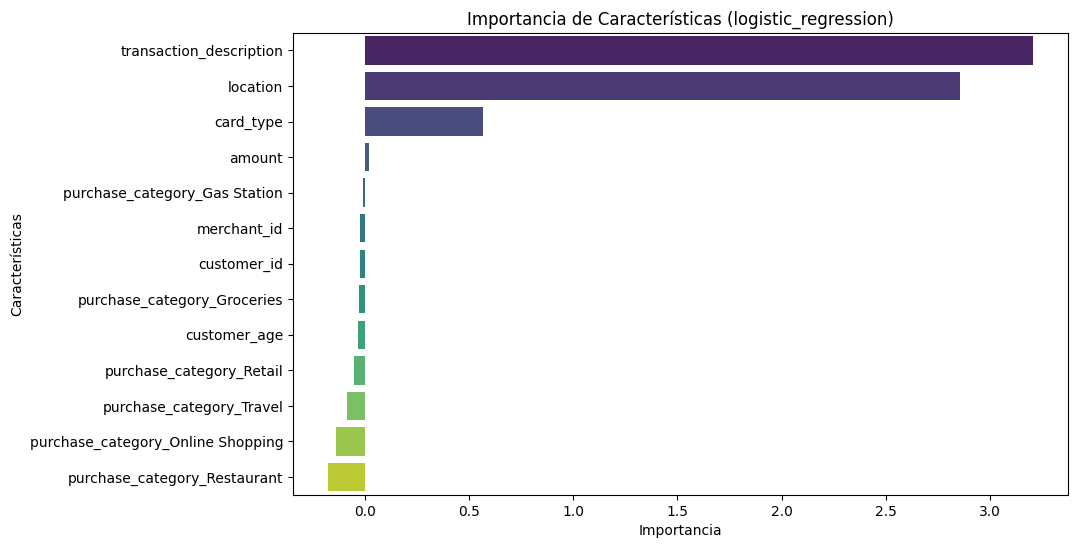

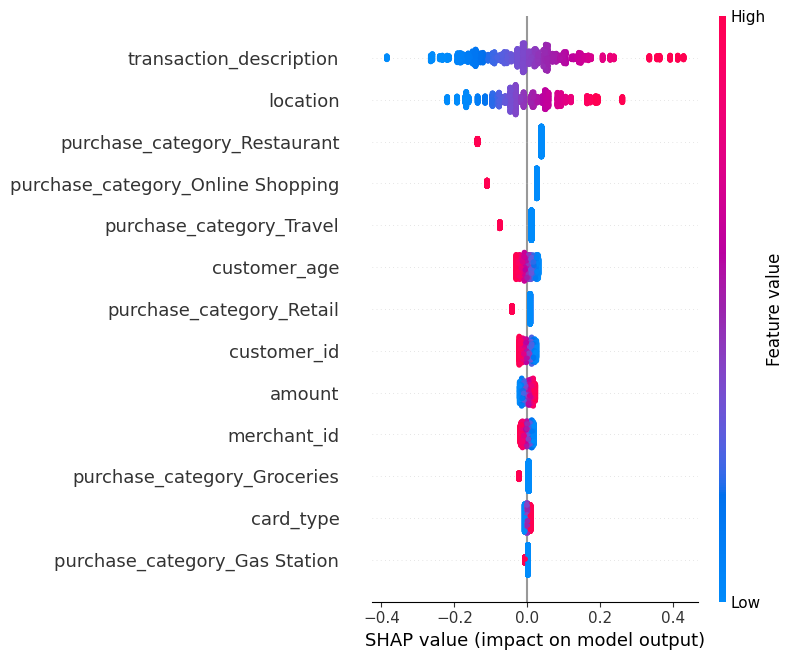

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.54975,0.549677,0.54975,0.549559,0.099178,0.568046,0.002992,8.0,NaN,NaN,regresion logistica
test,0.56950,0.569271,0.56950,0.569344,0.137504,0.587339,NaN,NaN,0.002992,8.0,regresion logistica


In [9]:
# instanciamos la clase de regresión logistica
logistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

El mejor modelo es DecisionTreeClassifier(max_depth=3)


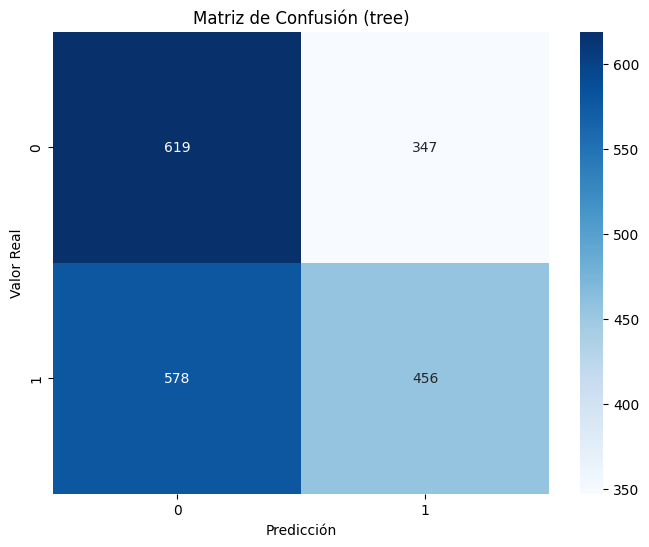

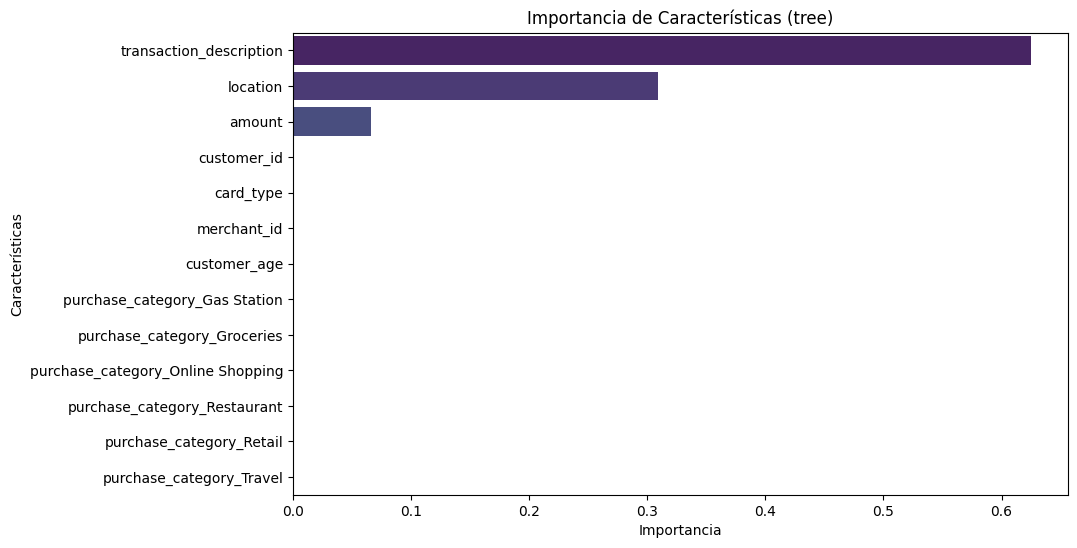

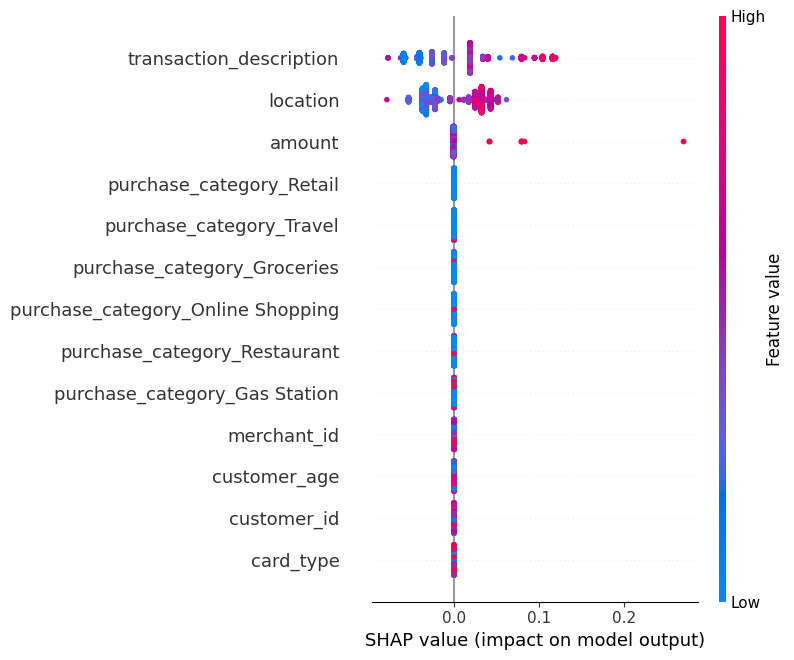

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.001995,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.001995,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.002992,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.002992,8.0,regresion logistica


In [10]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')
logistica.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=200)


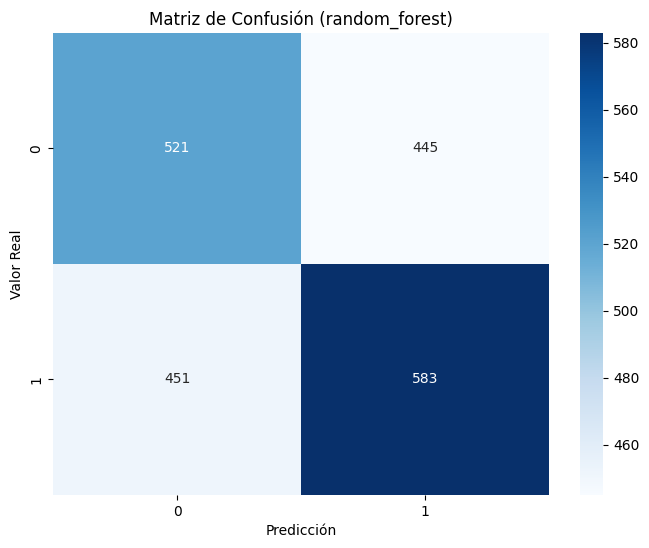

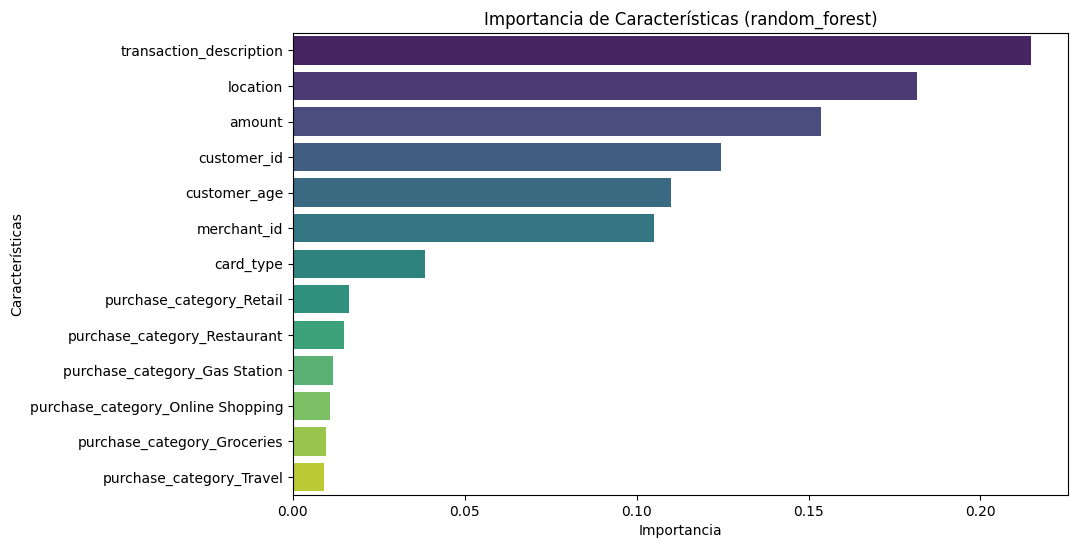

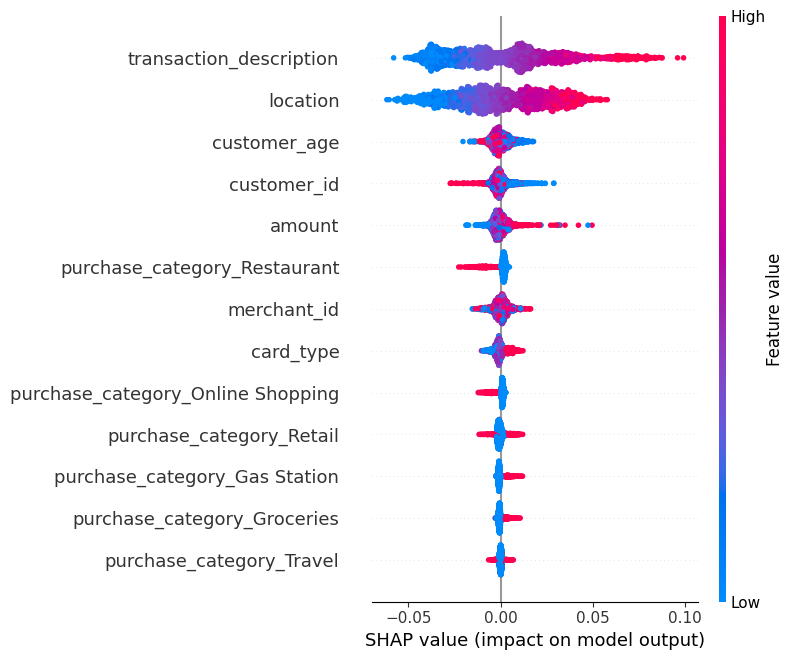

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.001995,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.001995,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.002992,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.002992,8.0,regresion logistica
train,0.629000,0.628982,0.629000,0.628953,0.257849,0.685054,0.110704,NaN,NaN,NaN,random_forest
test,0.552000,0.552093,0.552000,0.552042,0.103146,0.575365,NaN,NaN,0.110704,NaN,random_forest


In [11]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')
logistica.plot_shap_summary(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final


El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, subsample=0.8)


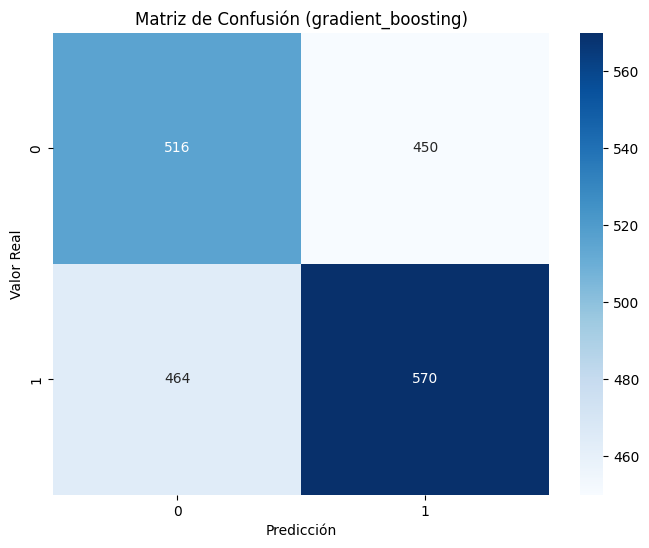

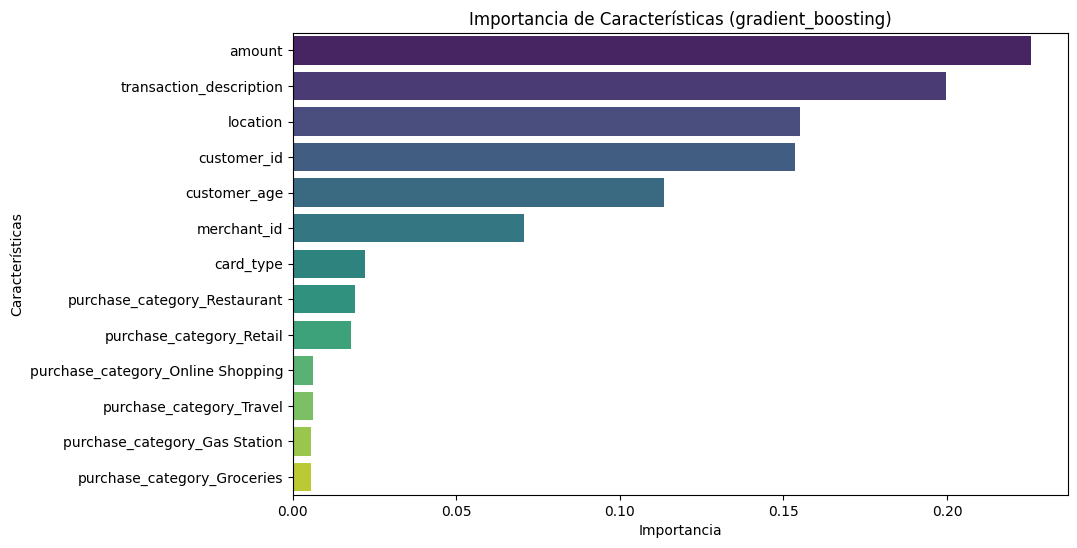

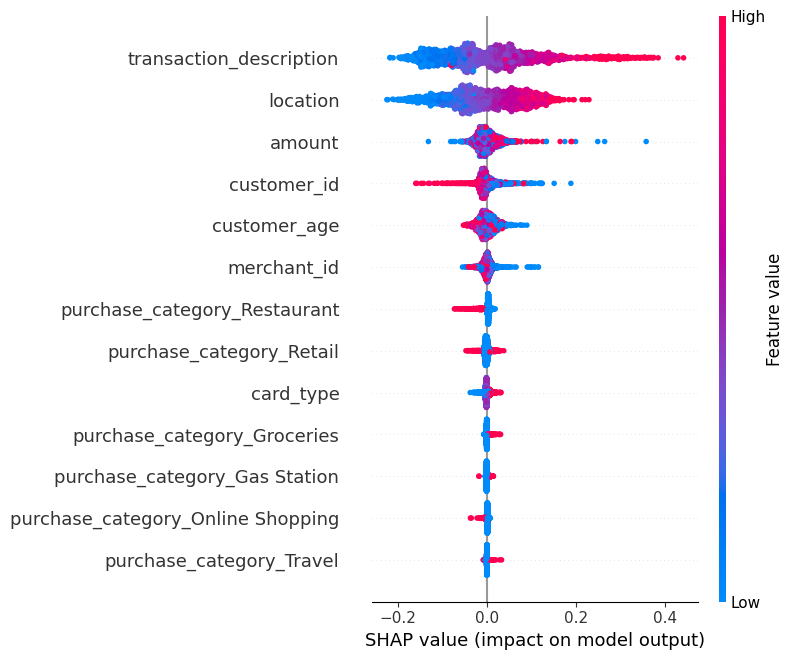

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.001995,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.001995,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.002992,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.002992,8.0,regresion logistica
train,0.629000,0.628982,0.629000,0.628953,0.257849,0.685054,0.110704,NaN,NaN,NaN,random_forest
test,0.552000,0.552093,0.552000,0.552042,0.103146,0.575365,NaN,NaN,0.110704,NaN,random_forest
train,0.620500,0.620483,0.620500,0.620432,0.240819,0.678566,0.034511,8.0,NaN,NaN,gradient_boosting
test,0.543000,0.543226,0.543000,0.543086,0.085378,0.566477,NaN,NaN,0.034511,8.0,gradient_boosting


In [12]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


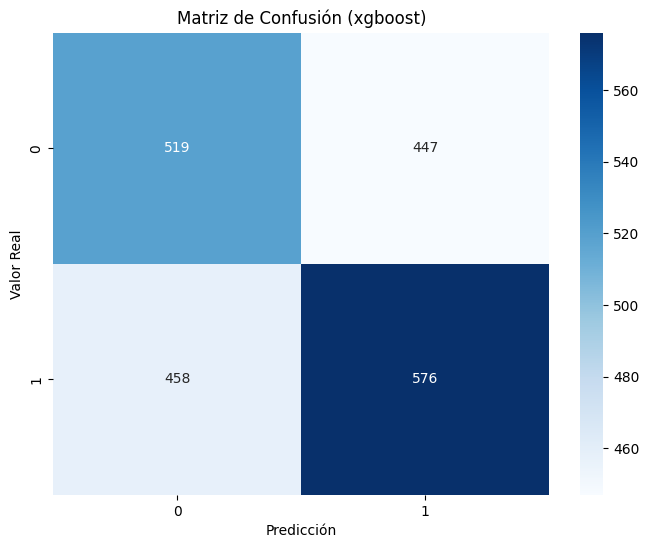

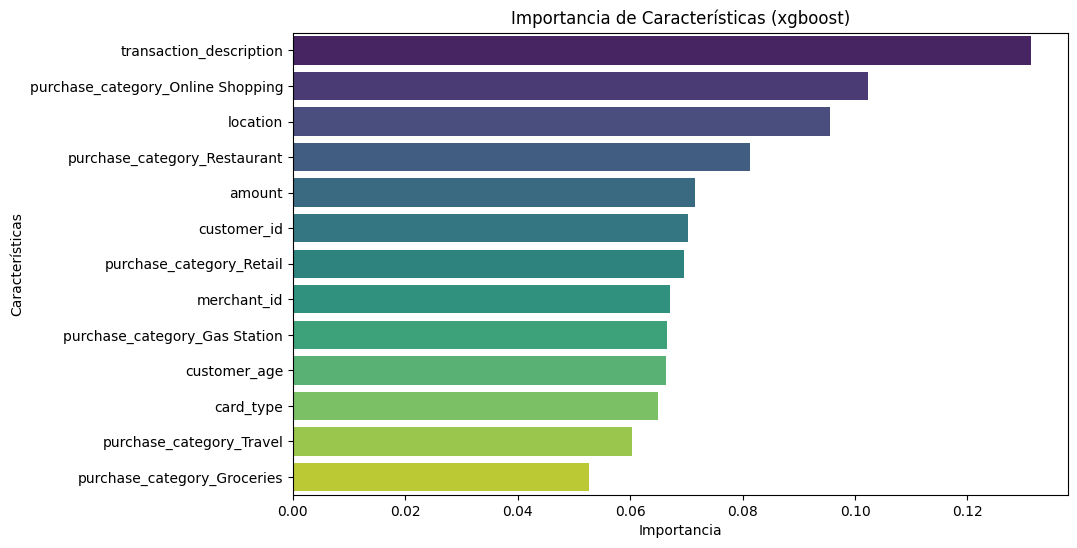

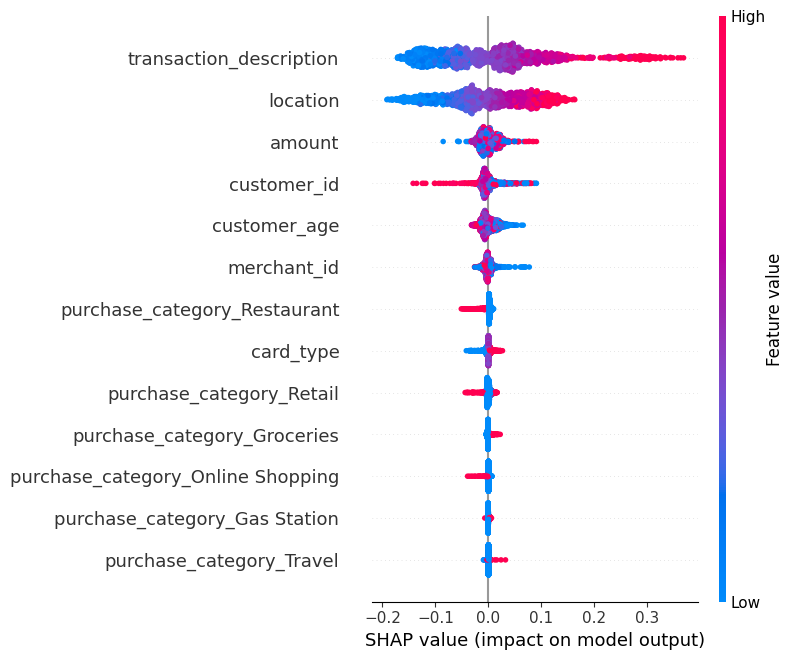

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.001995,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.001995,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.002992,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.002992,8.0,regresion logistica
train,0.629000,0.628982,0.629000,0.628953,0.257849,0.685054,0.110704,NaN,NaN,NaN,random_forest
test,0.552000,0.552093,0.552000,0.552042,0.103146,0.575365,NaN,NaN,0.110704,NaN,random_forest
train,0.620500,0.620483,0.620500,0.620432,0.240819,0.678566,0.034511,8.0,NaN,NaN,gradient_boosting
test,0.543000,0.543226,0.543000,0.543086,0.085378,0.566477,NaN,NaN,0.034511,8.0,gradient_boosting
train,0.587250,0.587218,0.587250,0.587205,0.174342,0.624509,0.019908,NaN,NaN,NaN,xgboost
test,0.547500,0.547675,0.547500,0.547571,0.094292,0.569560,NaN,NaN,0.019908,NaN,xgboost


In [13]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')
logistica.plot_shap_summary(modelo_nombre="xgboost")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [16]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True)
df_resultados_colores = df_resultados_colores.style.apply(sc.color_filas_por_modelo, axis=1)
df_resultados_colores

,index,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.001995,8.000000,nan,nan,decision tree
1,test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,nan,nan,0.001995,8.000000,decision tree
2,train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.002992,8.000000,nan,nan,regresion logistica
3,test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,nan,nan,0.002992,8.000000,regresion logistica
4,train,0.629000,0.628982,0.629000,0.628953,0.257849,0.685054,0.110704,nan,nan,nan,random_forest
5,test,0.552000,0.552093,0.552000,0.552042,0.103146,0.575365,nan,nan,0.110704,nan,random_forest
6,train,0.620500,0.620483,0.620500,0.620432,0.240819,0.678566,0.034511,8.000000,nan,nan,gradient_boosting
7,test,0.543000,0.543226,0.543000,0.543086,0.085378,0.566477,nan,nan,0.034511,8.000000,gradient_boosting
8,train,0.587250,0.587218,0.587250,0.587205,0.174342,0.624509,0.019908,nan,nan,nan,xgboost
9,test,0.547500,0.547675,0.547500,0.547571,0.094292,0.569560,nan,nan,0.019908,nan,xgboost
